# Client Subscription Prediction Model Project

### Data Loading, Preprocessing and Analysis

In [3]:
#Importing Libraries for various stages of Analyses
##EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
##Feature preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
##Model training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


# Loading dataset
bankdata = pd.read_csv('bank-additional-full.csv', sep=';')

### Exploratory Data Analysis

In [5]:
bankdata.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
bankdata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
bankdata.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [9]:
print(bankdata.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [10]:
bankdata['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [11]:
bankdata['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [12]:
bankdata['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [13]:
bankdata['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

### Visualizations

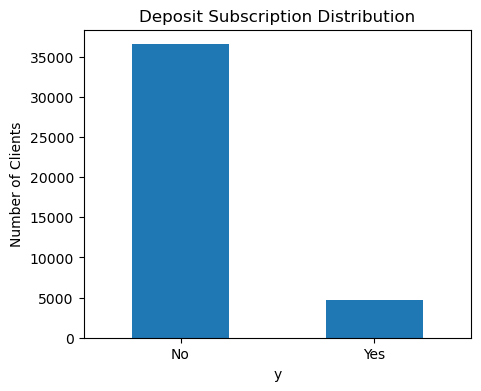

In [15]:
## Class distribution (target variable)
plt.figure(figsize=(5, 4))
bankdata['y'].value_counts().plot(kind='bar')
plt.title('Deposit Subscription Distribution')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.ylabel('Number of Clients')
plt.show()

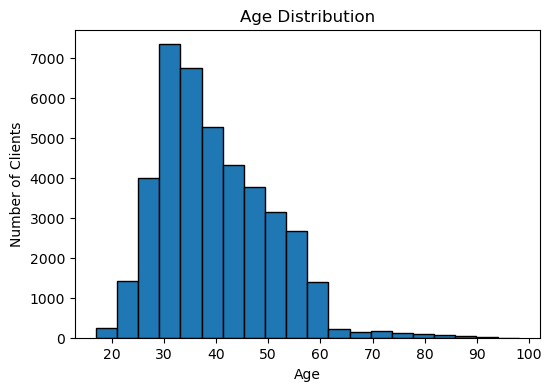

In [16]:
## Age distribution
plt.figure(figsize=(6, 4))
bankdata['age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

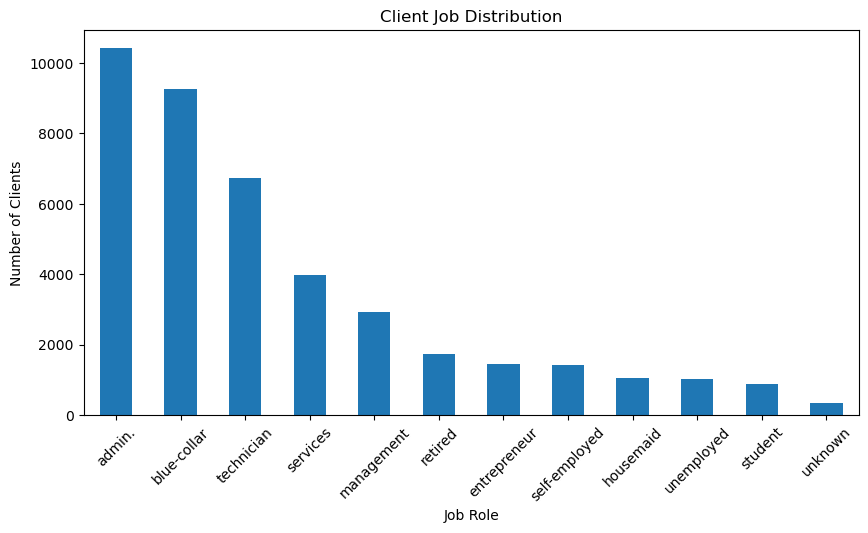

In [17]:
## Job distribution
plt.figure(figsize=(10, 5))
bankdata['job'].value_counts().plot(kind='bar')
plt.title('Client Job Distribution')
plt.ylabel('Number of Clients')
plt.xlabel('Job Role')
plt.xticks(rotation=45)
plt.show()
plt.show()

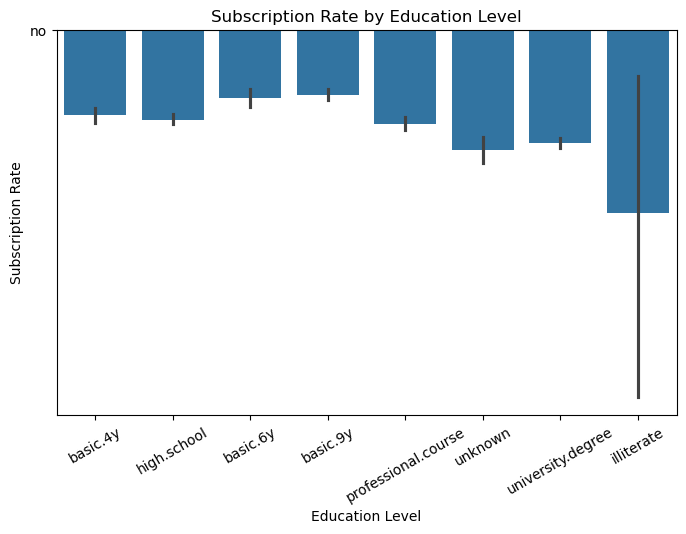

In [18]:
## Education vs Subscription Rate
plt.figure(figsize=(8, 5))
sns.barplot(data=bankdata, x='education', y='y')
plt.title('Subscription Rate by Education Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Education Level')
plt.xticks(rotation=30)
plt.show()

### Feature Preprocessing and Evaluation

In [20]:
## Dropping 'duration' column to avoid data leakage
bankdata = bankdata.drop(columns=['duration'])

## Mapping target variable 'y' to binary
bankdata['y'] = bankdata['y'].map({'yes': 1, 'no': 0})

## Creating new binary feature 'contacted_before' from 'pdays'
bankdata['contacted_before'] = bankdata['pdays'].apply(lambda x: 0 if x == 999 else 1)
bankdata = bankdata.drop(columns=['pdays'])

In [21]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41188 non-null  int64  
 1   job               41188 non-null  object 
 2   marital           41188 non-null  object 
 3   education         41188 non-null  object 
 4   default           41188 non-null  object 
 5   housing           41188 non-null  object 
 6   loan              41188 non-null  object 
 7   contact           41188 non-null  object 
 8   month             41188 non-null  object 
 9   day_of_week       41188 non-null  object 
 10  campaign          41188 non-null  int64  
 11  previous          41188 non-null  int64  
 12  poutcome          41188 non-null  object 
 13  emp.var.rate      41188 non-null  float64
 14  cons.price.idx    41188 non-null  float64
 15  cons.conf.idx     41188 non-null  float64
 16  euribor3m         41188 non-null  float6

In [22]:
bankdata.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted_before
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


In [23]:
## Defining feature categories
numeric_features = ['age', 'campaign', 'previous', 'campaign_efficiency']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                        'contact', 'month', 'poutcome', 'age_group']
binary_features = ['contact_recent', 'has_previous_contact']


## Building preprocessing pipelines for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   # fills NaNs with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

## Combining pipelines
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
    ('bin', 'passthrough', binary_features)
])

## Full pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [24]:
## Custom Transformer for Engineered Features
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        bankdata = X.copy()

## Age group
bankdata['age_group'] = pd.cut(bankdata['age'], bins=[18, 30, 45, 60, 100],
        labels=['Young', 'Adult', 'Mature', 'Senior'])

## Was contacted recently
bankdata['contact_recent'] = bankdata['contacted_before'].apply(lambda x: 1 if x != 999 and x <= 30 else 0)

## Has previous contact
bankdata['has_previous_contact'] = bankdata['previous'].apply(lambda x: 1 if x > 0 else 0)

## Campaign efficiency
bankdata['campaign_efficiency'] = bankdata['previous'] / (bankdata['campaign'] + 1)

print(bankdata.head(5))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  cons.price.idx  cons.conf.idx euribor3m  \
0   may         mon  ...          93.994          -36.4     4.857   
1   may         mon  ...          93.994          -36.4     4.857   
2   may         mon  ...          93.994          -36.4     4.857   
3   may         mon  ...          93.994          -36.4     4.857   
4   may         mon  ...          93.994          -36.4     4.857   

   nr.employed  y  contacted_before  age_group  contact_recent  \
0       5191.0  0                 0     Mature               1

In [25]:
##  Defining features and target
X = bankdata.drop(columns=['y'])
y = bankdata['y']


##  Defining categorical columns and numerical columns excluding target
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

## Handling missing values (they appear as 'unknown' strings in categorical columns)
## Replacing 'unknown' with Nan for imputation
X[cat_cols] = X[cat_cols].replace('unknown', np.nan)

In [26]:
## Custom transformer to convert columns to categorical dtype 
class ToCategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        for col in self.cols:
            X[col] = X[col].astype('category')
        return X



##  Fit preprocessor and transform data (example)
X_preprocessed = preprocessor.fit_transform(X)

print(f"Preprocessed feature matrix shape: {X_preprocessed.shape}")

Preprocessed feature matrix shape: (41188, 52)


### Model Training and Testing

In [28]:
## Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

## Full pipeline with model
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

## Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training model
pipeline.fit(X_train, y_train)

## Prediction and evaluation
y_pred = pipeline.predict(X_test)

## Defining model name and results container
name = 'Random Forest'
results = []

results.append({
    'Model': name,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
})

## Results
metric_result = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(metric_result)

           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.879218   0.440476  0.237433  0.308548


In [29]:
## Saving model pipeline
import joblib

joblib.dump(pipeline, "sub_pred_model.pkl")
print("Model saved as sub_pred_model.pkl!")

Model saved as sub_pred_model.pkl!


### App Deployment

In [64]:
import streamlit as st

# Loading model
model = joblib.load("sub_pred_model.pkl")

# App title
st.title("Bank Term Deposit Subscription Predictor")

# User inputs
age = st.slider("Age", 18, 95, 30)
job = st.selectbox("Job", ['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'self-employed', 'student', 'unknown'])
marital = st.selectbox("Marital Status", ['married', 'single', 'divorced'])
education = st.selectbox("Education", ['primary', 'secondary', 'tertiary', 'unknown'])
default = st.selectbox("Has Credit Default?", ['yes', 'no'])
housing = st.selectbox("Has Housing Loan?", ['yes', 'no'])
loan = st.selectbox("Has Personal Loan?", ['yes', 'no'])

# Assembling input for model
input_dictionary = {
    "age": age,
    "job": job,
    "marital": marital,
    "education": education,
    "default": default,
    "housing": housing,
    "loan": loan
}

input_bankdata = pd.DataFrame([input_dictionary])

# Encoding and prediction

if st.button("Predict"):
    prediction = model.predict(input_bankdata)
    result = "Yes" if prediction[0] == 1 else "No"
    st.success(f"Will the client subscribe? {result}")

2025-06-15 04:26:32.046 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 04:26:32.046 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 04:26:32.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 04:26:32.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 04:26:32.055 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 04:26:32.055 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 04:26:32.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 04:26:32.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar